# **Problum statment**
## Netflix Movies & TV Series

-- The Dtaset is about Daily-updated of the Netflix Movies & TV Series Dataset

-- This dataset provides a comprehensive collection of all Movies and TV Series available on Netflix.

-- In addition to basic information, it includes IMDb-specific data like IMDb ID, Average Rating, and Number of Votes.

-- This dataset have 8 Columns and 15860 Rows.

**Column Heads:**

-- **title**: The name of the movie or TV series.

-- **type**: Specifies whether the title is a movie or a TV series.

-- **genres**: The genre or genres associated with the title, such as drama, comedy,thriller, etc.

-- **release year**: The year in which the title was released.

-- **imdbID**: A unique identifier for the title on IMDb, which can be used to
cross-reference or gather additional data from IMDb.

-- **imdbAverageRating**: The average user rating for the title on IMDb, providing insight into its popularity or quality.

-- **imdbNumVotes**: The total number of votes the title has received on IMDb, indicating how widely viewed or rated the title is.

-- **availableCountries**: The countries where the title is available for streaming on Netflix.

* **TARGET VARIABLE in this Dtaset is imdbAverageRating**

**Goals**:

1. **Optimize Content Offerings**:

- Reasoning: By understanding factors that influence ratings (like genre, release year, etc.), Netflix can adjust its content strategy. This could involve investing in the production or acquisition of specific types of content that are likely to be well-received by viewers.

2. **Enhance User Experience**:

 - Reasoning: Accurately predicting ratings can lead to better recommendations for users. This ensures viewers are presented with content aligned with their preferences, leading to increased satisfaction and engagement.

3. **Inform Content Acquisition Strategies:**

- Reasoning: Before investing in new movies or series, Netflix can use the model to estimate potential audience reception. This data-driven approach minimizes risk and maximizes the chances of acquiring successful content.

4. **Improve Recommendation Systems**:

- Reasoning: This dataset can be used to train recommendation algorithms that suggest relevant and engaging content to users. This is crucial for keeping viewers hooked and reducing churn.

5. **Boost Audience Engagement:**

- Reasoning: By providing viewers with high-quality, tailored content, Netflix aims to increase overall engagement. This translates to more watch time, higher user satisfaction, and a stronger brand presence.


-- In essence, the overarching goal is to leverage insights from the data to make informed decisions about content creation, acquisition, and recommendation, ultimately enhancing the user experience and driving business success for Netflix.

----

# Libraries

In [1]:
import pandas as pd
import numpy as np

#Ploating
import matplotlib.pyplot as plt
import seaborn as sns

#Emcoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# x-y split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

#MSE AND MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Loading Dataset

In [2]:
df=pd.read_csv('/kaggle/input/full-netflix-dataset/data.csv')
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,518358.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1225520.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,212222.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,445463.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1109647.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...,...
20159,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AL, AZ, BA, BG, BY, CY, EE, FR, GF, HU, IT, LT..."
20160,NaN,tv,Drama,2024.0,NaN,NaN,NaN,"AO, CI, CM, CV, GH, GQ, KE, MG, ML, MU, MZ, NE..."
20161,NaN,tv,"Animation, Action & Adventure",2016.0,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."
20162,NaN,tv,NaN,NaN,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."


# ***Understanding the data***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20164 entries, 0 to 20163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19650 non-null  object 
 1   type                20164 non-null  object 
 2   genres              19896 non-null  object 
 3   releaseYear         20149 non-null  float64
 4   imdbId              18864 non-null  object 
 5   imdbAverageRating   18714 non-null  float64
 6   imdbNumVotes        18714 non-null  float64
 7   availableCountries  20164 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.2+ MB


* Columns title	type	genres	imdbId	availableCountries are objuct variables.
* Columns releaseYear imdbAverageRating	imdbNumVotes are numeric variables.

In [4]:
df.isnull().sum()

title                  514
type                     0
genres                 268
releaseYear             15
imdbId                1300
imdbAverageRating     1450
imdbNumVotes          1450
availableCountries       0
dtype: int64

* Column **title** have  **497 null values**.And the data type is **object**.

* Column **type** have  **no null values**.And the data type is **object**.

* Column **genres** have  **147 null values**.And the data type is **object**.

* Column **releaseYear** have  **12 null values**.And the data type is **float64**.

* Column **imdbId** have  **679 null values**.And the data type is **object**.

* Column **imdbAverageRating** have  **724 null values**.And the data type is **float64**.

* Column **imdbNumVotes** have **724 null values**.And the data type is **float64**.

* Column **availableCountries** have  **no null values**.And the data type is **object**.

-- Target variable imdbAverageRating have 724 null valuse

In [5]:
df.isnull().sum().sum()

4997

This dataset have total 2783

In [6]:
print(df.shape)

(20164, 8)


This dataset have 8 Columns and 15860 Rows.

In [7]:
# Checking total number of duplicates
df.duplicated().sum()

85

This dataset have 82 duplicate rows

In [8]:
# Checking title have any duplicates
df['title'].value_counts()

title
Perfect Strangers                            5
Monster                                      5
The Killer                                   5
Shadow                                       4
Life                                         4
                                            ..
To Steal from a Thief                        1
To My Beloved                                1
Un + Une                                     1
Bangistan                                    1
Blippi's Ultimate Bounce House Challenges    1
Name: count, Length: 18914, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
releaseYear,20149.0,2012.946896,14.415474,1913.0,2011.0,2018.0,2021.00,2025.0
imdbAverageRating,18714.0,6.397857,1.094516,1.2,5.7,6.5,7.20,9.5
imdbNumVotes,18714.0,31890.794325,120026.989067,5.0,339.0,1625.0,10371.75,2971778.0


# Data Cleaning

In [10]:
# Coping df into df1
df1=df.copy()

In [11]:
# Droping duplicates
df1.drop_duplicates(inplace=True)

In [12]:
# chacking is there any null values after removing duplicates
print(df1.isnull().sum())

title                  429
type                     0
genres                 260
releaseYear             15
imdbId                1215
imdbAverageRating     1365
imdbNumVotes          1365
availableCountries       0
dtype: int64


In [13]:
# Checkin is there still any null values in Target variable
df1['imdbAverageRating'].isnull().sum()

1365

In [14]:
# Dropping rows where target variable (imdbAverageRating) have null value
df1=df1.dropna(subset=['imdbAverageRating'])

In [15]:
# chacking is there any null values after removing null values in the target variable(imdbAverageRating)
print(df1.isnull().sum())

title                 0
type                  0
genres                0
releaseYear           0
imdbId                0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
dtype: int64


Now there is no null values in the dataset

In [16]:
df1.duplicated().sum()

0

Now there is no duplicated rows in the dataset

**Droping**

In [17]:
# Dropping column availableCountries
# Scince this feature is not proper and confusing so willl drop the column availableCountries
df1=df1.drop('availableCountries',axis=1)

In [18]:
# Dropping column imdbId
df1=df1.drop('imdbId',axis=1)

In [19]:
df1

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,518358.0
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1225520.0
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212222.0
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,445463.0
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1109647.0
...,...,...,...,...,...,...
20146,This Is the Zodiac Speaking,tv,"Crime, Documentary",2024.0,7.2,5288.0
20147,The Manhattan Alien Abduction,tv,Documentary,2024.0,5.3,1290.0
20149,Children of the Church Steps,tv,"Drama, History, Thriller",2024.0,6.7,318.0
20152,Don't Come Home,tv,"Drama, Horror, Mystery",2024.0,7.2,2630.0


In [20]:
# Changing dtype of releaseYear form float into int
df1['releaseYear']=df1['releaseYear'].astype('int64')

In [21]:
# # Changing dtype of 'imdbNumVotes' from float into int
df1['imdbNumVotes']=df1['imdbNumVotes'].astype('int64')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18714 entries, 0 to 20156
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              18714 non-null  object 
 1   type               18714 non-null  object 
 2   genres             18714 non-null  object 
 3   releaseYear        18714 non-null  int64  
 4   imdbAverageRating  18714 non-null  float64
 5   imdbNumVotes       18714 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1023.4+ KB


# Feature Engineers

In [23]:
# Creating new column named  perfomance_of_movies

In [24]:
df1['perfomance_of_movies']=df1['imdbAverageRating']
df1

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,perfomance_of_movies
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,518358,7.6
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1225520,8.2
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,212222,7.0
3,Unforgiven,movie,"Drama, Western",1992,8.2,445463,8.2
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,1109647,8.3
...,...,...,...,...,...,...,...
20146,This Is the Zodiac Speaking,tv,"Crime, Documentary",2024,7.2,5288,7.2
20147,The Manhattan Alien Abduction,tv,Documentary,2024,5.3,1290,5.3
20149,Children of the Church Steps,tv,"Drama, History, Thriller",2024,6.7,318,6.7
20152,Don't Come Home,tv,"Drama, Horror, Mystery",2024,7.2,2630,7.2


In [25]:
def movie_rating(x):
    if not pd.isna(x):  # Check if x is NOT NaN
        if x > 8.5:
            return 'super hit'
        elif 6.5 < x <= 8.5:
            return 'hit'
        elif 5.0 <= x <= 6.5:
            return 'average'
        else:
            return 'below average'
    else:
        return 'not rated'  # Handle NaN values

df1['perfomance_of_movies'] = df1['imdbAverageRating'].apply(movie_rating)
print(df1)

                                       title   type  \
0                          The Fifth Element  movie   
1                          Kill Bill: Vol. 1  movie   
2                                    Jarhead  movie   
3                                 Unforgiven  movie   
4      Eternal Sunshine of the Spotless Mind  movie   
...                                      ...    ...   
20146            This Is the Zodiac Speaking     tv   
20147          The Manhattan Alien Abduction     tv   
20149           Children of the Church Steps     tv   
20152                        Don't Come Home     tv   
20156   The Evolution of Black British Music     tv   

                          genres  releaseYear  imdbAverageRating  \
0      Action, Adventure, Sci-Fi         1997                7.6   
1        Action, Crime, Thriller         2003                8.2   
2          Biography, Drama, War         2005                7.0   
3                 Drama, Western         1992                8.2   

# ***Data visualization***

**imdbAverageRating**



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='imdbAverageRating', ylabel='Count'>

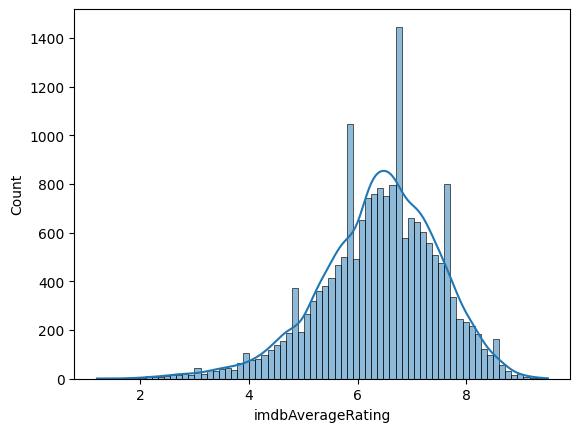

In [26]:
sns.histplot(df1['imdbAverageRating'], kde=True)

**imdbNumVotes**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='imdbNumVotes', ylabel='Count'>

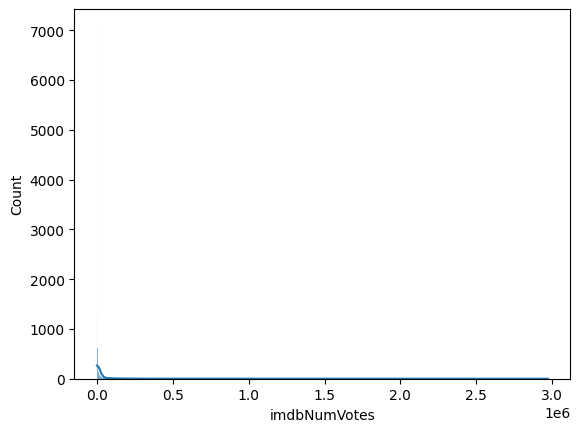

In [27]:
sns.histplot(df1['imdbNumVotes'], kde=True)

In [28]:
df1['imdbNumVotes'].skew()

9.559369936025936

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='imdbNumVotes', ylabel='Count'>

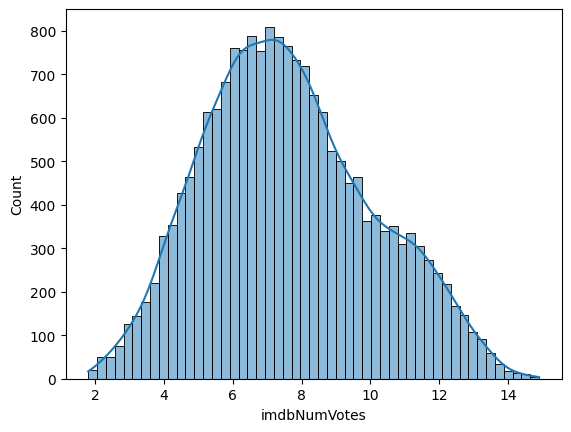

In [29]:
# Handling skewness of imdbNumVotes
df1['imdbNumVotes']=np.log1p(df1['imdbNumVotes'])
sns.histplot(df1['imdbNumVotes'], kde=True)

In [30]:
df1['imdbNumVotes'].skew()

0.29136315248223754

**releaseYear**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='releaseYear', ylabel='Count'>

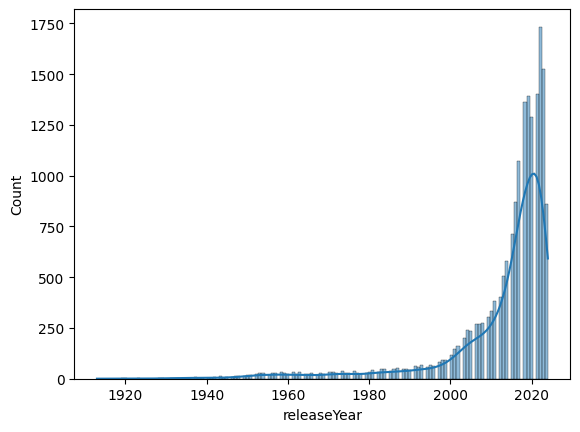

In [31]:
sns.histplot(df1['releaseYear'], kde=True)

In [32]:
df1['releaseYear'].skew()

-2.666438988555711

In [33]:
# df1['releaseYear']=np.log1p(df1['releaseYear'])
# sns.histplot(df1['releaseYear'], kde=True)

In [34]:
df1['releaseYear'].skew()

-2.666438988555711

**type**

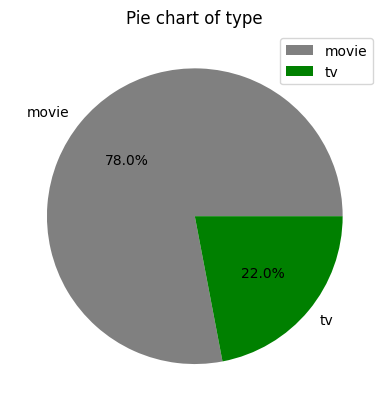

In [35]:
plt.pie(df1['type'].value_counts(),labels=(df1['type'].unique()),autopct='%1.1f%%',colors=['grey','g'])
plt.title('Pie chart of type')
plt.legend(df1['type'].unique())
plt.show()

* In the column type 70% ofv the values  are movie & 27% are tv

perfomance_of_movies

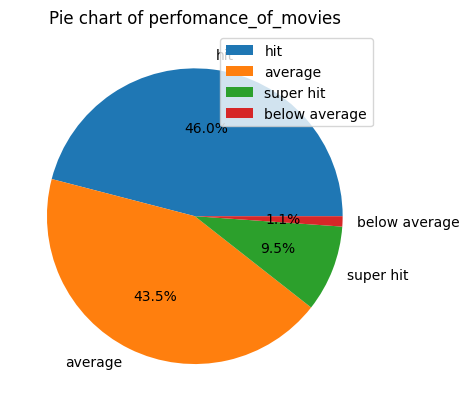

In [36]:
plt.pie(df1['perfomance_of_movies'].value_counts(),labels=(df1['perfomance_of_movies'].unique()),autopct='%1.1f%%')
plt.title('Pie chart of perfomance_of_movies')
plt.legend(df1['perfomance_of_movies'].unique())
plt.show()

* In the column perfomance_of_movies we can understand 49% of the movies or tv series are super hit , 42.1% are hit ,7.6% are average & 1.2% are below average.

# Encoding

**Encode the column 'type' with replace method.**

In [37]:
df1['type'].unique()

array(['movie', 'tv'], dtype=object)

In [38]:
# Column type has only 2 unique values
# so use replace methode for encoding
df1['type'].replace(['movie', 'tv'],[0,1],inplace=True)
df1

/tmp/ipykernel_17/2585881093.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['type'].replace(['movie', 'tv'],[0,1],inplace=True)
/tmp/ipykernel_17/2585881093.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['type'].replace(['movie', 'tv'],[0,1],inplace=True)


,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,perfomance_of_movies
0,The Fifth Element,0,"Action, Adventure, Sci-Fi",1997,7.6,13.158423,hit
1,Kill Bill: Vol. 1,0,"Action, Crime, Thriller",2003,8.2,14.018877,hit
2,Jarhead,0,"Biography, Drama, War",2005,7.0,12.265393,hit
3,Unforgiven,0,"Drama, Western",1992,8.2,13.006872,hit
4,Eternal Sunshine of the Spotless Mind,0,"Drama, Romance, Sci-Fi",2004,8.3,13.919553,hit
...,...,...,...,...,...,...,...
20146,This Is the Zodiac Speaking,1,"Crime, Documentary",2024,7.2,8.573384,hit
20147,The Manhattan Alien Abduction,1,Documentary,2024,5.3,7.163172,average
20149,Children of the Church Steps,1,"Drama, History, Thriller",2024,6.7,5.765191,hit
20152,Don't Come Home,1,"Drama, Horror, Mystery",2024,7.2,7.875119,hit


**Encode the columns title & genres using label encoder**

In [39]:
# Encoding columns title and genres with label encoding
df1['title']=le.fit_transform(df1['title'])
df1['genres']=le.fit_transform(df1['genres'])
df1['perfomance_of_movies']=le.fit_transform(df1['perfomance_of_movies'])#change it to int
df1

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,perfomance_of_movies
0,14472,0,15,1997,7.6,13.158423,2
1,7541,0,59,2003,8.2,14.018877,2
2,7073,0,282,2005,7.0,12.265393,2
3,17016,0,562,1992,8.2,13.006872,2
4,4539,0,543,2004,8.3,13.919553,2
...,...,...,...,...,...,...,...
20146,16365,1,397,2024,7.2,8.573384,2
20147,15197,1,438,2024,5.3,7.163172,0
20149,2858,1,514,2024,6.7,5.765191,2
20152,3989,1,520,2024,7.2,7.875119,2


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18714 entries, 0 to 20156
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 18714 non-null  int64  
 1   type                  18714 non-null  int64  
 2   genres                18714 non-null  int64  
 3   releaseYear           18714 non-null  int64  
 4   imdbAverageRating     18714 non-null  float64
 5   imdbNumVotes          18714 non-null  float64
 6   perfomance_of_movies  18714 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


* Now all variables are numeric.

# Correlation Analysis:

In [41]:
c=df1.corr()
c

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,perfomance_of_movies
title,1.000000,0.002709,0.001072,-0.033864,0.014599,0.039279,-0.002888
type,0.002709,1.000000,0.003720,0.204707,0.313699,-0.040840,0.256920
genres,0.001072,0.003720,1.000000,0.001904,-0.012487,-0.198065,-0.007147
releaseYear,-0.033864,0.204707,0.001904,1.000000,-0.028123,-0.016041,0.014090
imdbAverageRating,0.014599,0.313699,-0.012487,-0.028123,1.000000,0.239747,0.623181
imdbNumVotes,0.039279,-0.040840,-0.198065,-0.016041,0.239747,1.000000,0.162104
perfomance_of_movies,-0.002888,0.256920,-0.007147,0.014090,0.623181,0.162104,1.000000


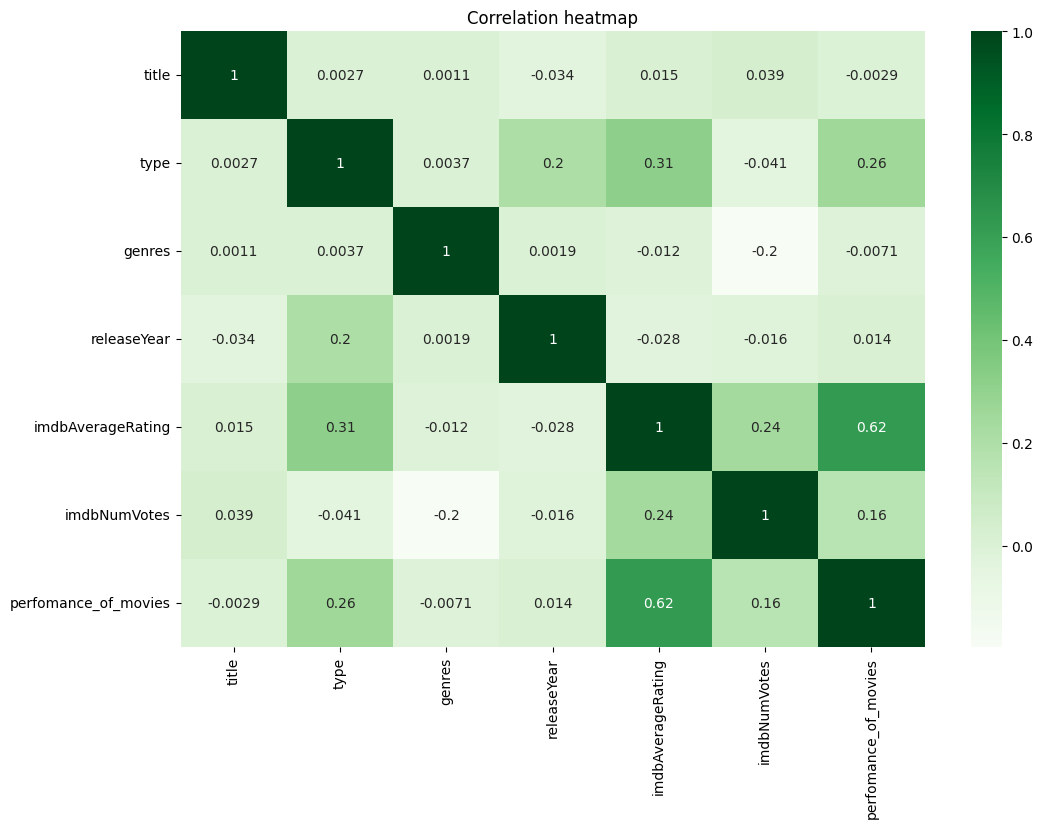

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

In [43]:
s=df1.corr()['imdbAverageRating']
s.sort_values(ascending=False)

imdbAverageRating       1.000000
perfomance_of_movies    0.623181
type                    0.313699
imdbNumVotes            0.239747
title                   0.014599
genres                 -0.012487
releaseYear            -0.028123
Name: imdbAverageRating, dtype: float64

# Feature Selection

In [44]:
x=df1[['title','type','genres','releaseYear','imdbNumVotes','perfomance_of_movies']]
y=df1['imdbAverageRating']

# Data Splitting

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Data Scaling

In [46]:
# x_train and x_test scaled with StandardScaler

In [47]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initial Modeling & Hypothesis Testing

In [48]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [49]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [50]:
# Dictionary to store the results
results = {}

In [51]:
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
  else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [52]:
# Convert results to a DataFrame for better visualization
results_df1= pd.DataFrame(results).T
print(results_df1)

                               MAE      RMSE        R²
Linear Regression         0.566163  0.821175  0.434066
Ridge Regression          0.566159  0.821174  0.434068
Lasso Regression          0.844704  1.091347  0.000416
ElasticNet Regression     0.757375  1.021870  0.123635
Decision Tree             0.486348  0.632422  0.664334
Random Forest             0.374754  0.465722  0.817969
Gradient Boosting         0.367756  0.449717  0.830264
Support Vector Regressor  0.374474  0.479609  0.806951
K-Nearest Neighbors       0.889591  1.145644 -0.101521
Neural Network            0.370559  0.458490  0.823578


**The best performing model is: Gradient Boosting**

# Model

In [53]:
model= GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [54]:
y_pred=model.predict(x_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.8302642544893192


In [55]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.3677561762656595
Mean Squared Error: 0.20224582207562225
Root Mean Squared Error: 0.44971749140501777


# Prediction

In [56]:
x_test

,title,type,genres,releaseYear,imdbNumVotes,perfomance_of_movies
5063,2783,0,125,2014,12.380228,2
9401,3500,0,275,2019,11.623760,2
18897,9789,1,213,2023,8.626406,2
8610,8295,0,613,2018,7.229114,0
3585,8680,0,483,2010,6.336826,2
...,...,...,...,...,...,...
18247,17359,1,641,2021,3.178054,2
2748,12806,0,74,2013,11.447661,0
17090,3553,1,4,2019,10.099424,2
7406,16827,0,380,2016,3.761200,1


In [57]:
y_test

5063     7.3
9401     7.6
18897    7.7
8610     6.2
3585     6.7
        ... 
18247    7.1
2748     6.4
17090    6.7
7406     4.7
11595    5.8
Name: imdbAverageRating, Length: 3743, dtype: float64

In [58]:
input_data=(870,	0	,519,	2010,	4.644391,	0)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

[5.90533207]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


#**Documentation and Reporting**


## Netflix Movies & TV Series Project Report
**1.Libraries:**
- import required Libraries.

**2. Problem Statement:**
- This dataset provides a comprehensive collection of all Movies and TV Series available on Netflix.
The primary objective is to build a model that accurately predicts the imdbAverageRating of a Movies or TV Series based on its features.

**3. Data Understanding:**
- The dataset has 15860 rows and 8 columns.
- Features include: title , type    , genres    , releaseYear   , imdbId ,  imdbAverageRating   , imdbNumVotes and availableCountries.
- Target Variable: imdbAverageRating.

**4. Data Cleaning:**
- 82 duplicated rows where found.
- duplicated rows removed.
- Missing values were found in 'title' , 'genres' , 'releaseYear' , 'imdbId' , 'imdbAverageRating' and 'imdbNumVotes' columns.
- Missing values were handled by droping rows where have null values.
- Droped the column availableCountries.
- Droped the column imdbId.
- Changed dtype of releaseYear and imdbNumVotes from float into int.

**5.Feature Engineering:**
- Created new column named 'perfomance_of_movies'.

**6. Data Visualization:**
- Histogram were created for entire dataset to understand their distribution.
- Histograms were created for imdbAverageRating, imdbNumVotes and releaseYear to understand their distributions.
- Pie chart created for type & perfomance_of_movies to understand their percent for each value.
- Skewness of imdbNumVotes handled using log1p method.

**7. Encoding:**
- Encode the column type with replace method.
- Encode columns title , genres & perfomance_of_movies with label encoding.

**8. Correlation Analysis:**
- Correlation Analysis: a heatmap of the correlation matrix revealed the relationships between the variables.

**9. Feature Selection:**
* Target column stored in y variable.
* Other features stored in x variable.

**10. Data Splitting:**
* split x_train, x_test, y_train and y_test.

**11. Data Scaling:**
- x_train and x_test were scaled using StandardScaler.

**12. Initial Modeling & Hypothesis Testing:**

-- Multiple regression models were tested:-
* Linear Regression.
* Ridge Regression.
* Lasso Regression.
* ElasticNet Regression.
* Decision Tree Regression.
* Random Forest Regression.
* Gradient Boosting Regression.
* Support Vector Regression.
* K-Nearest Neighbors Regression.
* Neural Network Regression.

-- Gradient Boosting has given the best result with accuracy around 0.8209663293999218 .And it was chosen as the final model.

**13.Model:**

-- Evaluation metrics included Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2).
- Mean Absolute Error: 0.3604838207057812
- Mean Squared Error: 0.19709931073655568
- Root Mean Squared Error: 0.44395868133932875
- R2-squared: 0.820966

**13.Prediction:**
* Predicte the Model.

**THANK YOU**